# Soccer: Are really taller soccer players not as skilled as short players?
- Hernán Adasme Herrera

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Soccer or, more accurately, Fútbol, is the greatest cultural artifact and massmedia commodite in Latin América. Since we are little we learn the basic skills that determine how good you are as a soccer player: ball control, passing accuracy and dribbling. Those are the most valued skills in our culture, and they characterize our style of playing: el "jogo bonito" (beautiful game). On the other hand, there is this common notion that says that the taller you are, the less likely you´ll be 'bueno para la pelota' (good with the ball). Popular culture also says that smaller players are better because their mass gravity center is located closer to the ground. In other words, the traditional vision portraits tall players as stiff and physical, great for defensive positions and well suited to become goal keepers. I am going to use this dataset to figure out how real is that notion. Are taller players less skilled with the ball on their feet?  

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from scipy.stats import percentileofscore

In [4]:
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter 
from pylab import rcParams 
import os

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Here is how I got the data from the Soccer by using SQLlite:

SELECT*
	FROM Player 
	JOIN Player_Attributes	
	ON Player.player_fifa_api_id = Player_Attributes.player_fifa_api_id AND Player.player_api_id = Player_Attributes.player_api_id 
    
Then I exported the table as a CSV file. That´s the one that I´ll be using for this project. 

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv(r'C:\Users\herna\Desktop\Udacity\Project_03\player_attributes_id.csv')
df.shape

(183978, 49)


### Programatic Assessment and Data Cleaning

Dataset originally contains 183978 rows and 49 columns

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.shape

(183978, 49)

In [7]:
df.describe()

id  player_api_id  player_fifa_api_id         height  \
count  183978.000000  183978.000000       183978.000000  183978.000000   
mean     5520.197785  135900.617324       165636.285936     181.878872   
std      3191.425870  136927.840510        53856.899802       6.394818   
min         1.000000    2625.000000            2.000000     157.480000   
25%      2754.000000   34763.000000       155681.000000     177.800000   
50%      5532.000000   77741.000000       183471.000000     182.880000   
75%      8256.000000  191080.000000       199843.750000     185.420000   
max     11075.000000  750584.000000       234141.000000     208.280000   

              weight          id.1  player_fifa_api_id.1  player_api_id.1  \
count  183978.000000  183978.00000         183978.000000    183978.000000   
mean      168.776245   91989.50000         165671.524291    135900.617324   
std        15.088920   53110.01825          53851.094769    136927.840510   
min       117.000000       1.00000              2.000000      2625.000000   
25%       159.000000   45995.25000         155798.000000     34763.000000   
50%       168.000000   91989.50000         183488.000000     77741.000000   
75%       179.000000  137983.75000         199848.000000    191080.000000   
max       243.000000  183978.00000         234141.000000    750584.000000   

       overall_rating      potential  ...         vision      penalties  \
count   183142.000000  183142.000000  ...  181265.000000  183142.000000   
mean        68.600015      73.460353  ...      57.873550      55.003986   
std          7.041139       6.592271  ...      15.144086      15.546519   
min         33.000000      39.000000  ...       1.000000       2.000000   
25%         64.000000      69.000000  ...      49.000000      45.000000   
50%         69.000000      74.000000  ...      60.000000      57.000000   
75%         73.000000      78.000000  ...      69.000000      67.000000   
max         94.000000      97.000000  ...      97.000000      96.000000   

             marking  standing_tackle  sliding_tackle      gk_diving  \
count  183142.000000    183142.000000   181265.000000  183142.000000   
mean       46.772242        50.351257       48.001462      14.704393   
std        21.227667        21.483706       21.598778      16.865467   
min         1.000000         1.000000        2.000000       1.000000   
25%        25.000000        29.000000       25.000000       7.000000   
50%        50.000000        56.000000       53.000000      10.000000   
75%        66.000000        69.000000       67.000000      13.000000   
max        96.000000        95.000000       95.000000      94.000000   

         gk_handling     gk_kicking  gk_positioning    gk_reflexes  
count  183142.000000  183142.000000   183142.000000  183142.000000  
mean       16.063612      20.998362       16.132154      16.441439  
std        15.867382      21.452980       16.099175      17.198155  
min         1.000000       1.000000        1.000000       1.000000  
25%         8.000000       8.000000        8.000000       8.000000  
50%        11.000000      12.000000       11.000000      11.000000  
75%        15.000000      15.000000       15.000000      15.000000  
max        93.000000      97.000000       96.000000      96.000000  

[8 rows x 43 columns]

In [8]:
df.isnull().sum()

id                         0
player_api_id              0
player_name                0
player_fifa_api_id         0
birthday                   0
height                     0
weight                     0
id.1                       0
player_fifa_api_id.1       0
player_api_id.1            0
date                       0
overall_rating           836
potential                836
preferred_foot           836
attacking_work_rate     3230
defensive_work_rate      836
crossing                 836
finishing                836
heading_accuracy         836
short_passing            836
volleys                 2713
dribbling                836
curve                   2713
free_kick_accuracy       836
long_passing             836
ball_control             836
acceleration             836
sprint_speed             836
agility                 2713
reactions                836
balance                 2713
shot_power               836
jumping                 2713
stamina                  836
strength      

In [9]:
df.head(1)

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   

              birthday  height  weight  id.1  player_fifa_api_id.1  \
0  1992-02-29 00:00:00  182.88     187     1                218353   

   player_api_id.1  ... vision  penalties  marking standing_tackle  \
0           505942  ...   54.0       48.0     65.0            69.0   

  sliding_tackle gk_diving  gk_handling  gk_kicking  gk_positioning  \
0           69.0       6.0         11.0        10.0             8.0   

   gk_reflexes  
0          8.0  

[1 rows x 49 columns]

In [10]:
df_new = df.dropna(axis=0, how='any')

In [11]:
df_new.isnull().sum()

id                      0
player_api_id           0
player_name             0
player_fifa_api_id      0
birthday                0
height                  0
weight                  0
id.1                    0
player_fifa_api_id.1    0
player_api_id.1         0
date                    0
overall_rating          0
potential               0
preferred_foot          0
attacking_work_rate     0
defensive_work_rate     0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
dribbling               0
curve                   0
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility                 0
reactions               0
balance                 0
shot_power              0
jumping                 0
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning 

No duplicates, but each player has serveral records taken from serveral seassons; I am just going to use records from 2016; if there are more than one record fromm that year, I will collapse those records into one by using the mean function

In [12]:
sum(df.duplicated())

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    183978 non-null  int64  
 1   player_api_id         183978 non-null  int64  
 2   player_name           183978 non-null  object 
 3   player_fifa_api_id    183978 non-null  int64  
 4   birthday              183978 non-null  object 
 5   height                183978 non-null  float64
 6   weight                183978 non-null  int64  
 7   id.1                  183978 non-null  int64  
 8   player_fifa_api_id.1  183978 non-null  int64  
 9   player_api_id.1       183978 non-null  int64  
 10  date                  183978 non-null  object 
 11  overall_rating        183142 non-null  float64
 12  potential             183142 non-null  float64
 13  preferred_foot        183142 non-null  object 
 14  attacking_work_rate   180748 non-null  object 
 15  

#  Programatic Assessment: 
## Quality 
> **European Soccer Table** 
> - Columns that won´t perform calculations with: `id.1`,`player_fifa_api_id.1`,`player_api_id.1`, `gk_reflexes`,`gk_diving`,`gk_handling`,`gk_kicking`, `gk_positioning`,`gk_diving`,`gk_handling`,`gk_kicking`, `gk_positioning`,`standing_tackle`, `sliding_tackle`, `marking`, `penalties`, `aggression`,`free_kick_accuracy`, `curve`, `crossing`, `finishing`, `volleys`,`balance`, `interceptions`, `reactions`, `long_passing`, `defensive_work_rate`, `attacking_work_rate`, `acceleration`, `stamina`, `positioning`, `vision`, `potential`
> - One duplicated value
> - `date` column and `birthday` column not in datetime datatype
> - Null Values on columns: 835 on `overall_rating`, `preferred_foot`, `heading_accuracy`, `short_passing`, `dribbling`, `ball_control`, `sprint_speed`,
     `shot_power`, `strenght`, `long_shots`; 2712 on `agility` and `jumping`
        
## Tidiness 
> - More years than I actually need. Select just records from 2016
> - When selecting just 2016 records, there are still more than one record for player: collapse those records just into one.  
> - Overall Ratting variable is continuous; create a categorical version of this variable to ease the analysis. 


**Define**
- Drop columns that won´t be analyzed

**Code**

In [14]:
df.drop(['id.1','player_fifa_api_id.1','player_api_id.1', 'gk_reflexes','gk_diving','gk_handling','gk_kicking', 'gk_positioning','gk_diving','gk_handling','gk_kicking', 'gk_positioning','standing_tackle', 'sliding_tackle', 'marking', 'penalties', 'aggression','free_kick_accuracy', 'curve', 'crossing', 'finishing', 'volleys','balance', 'interceptions', 'reactions', 'long_passing', 'defensive_work_rate', 'attacking_work_rate', 'acceleration', 'stamina', 'positioning', 'vision', 'potential'], axis=1, inplace =True)

**Test**

In [15]:
df.head(1)

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   

              birthday  height  weight                 date  overall_rating  \
0  1992-02-29 00:00:00  182.88     187  2016-02-18 00:00:00            67.0   

  preferred_foot  heading_accuracy  short_passing  dribbling  ball_control  \
0          right              71.0           61.0       51.0          49.0   

   sprint_speed  agility  shot_power  jumping  strength  long_shots  
0          64.0     59.0        55.0     58.0      76.0        35.0

**Define**
- Check for duplicates/Drop duplicates

**Code**

In [16]:
#check for duplicates
sum(df.duplicated())

1

In [17]:
#drop duplicates
df.drop_duplicates(inplace = True)

**Test**

In [18]:
#check for duplicates
sum(df.duplicated())

0

**Define**
- Change `date` and `birthday` into datetime datatype

**Code**

In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
df['birthday'] = pd.to_datetime(df['birthday'])

**Test**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183977 entries, 0 to 183977
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  183977 non-null  int64         
 1   player_api_id       183977 non-null  int64         
 2   player_name         183977 non-null  object        
 3   player_fifa_api_id  183977 non-null  int64         
 4   birthday            183977 non-null  datetime64[ns]
 5   height              183977 non-null  float64       
 6   weight              183977 non-null  int64         
 7   date                183977 non-null  datetime64[ns]
 8   overall_rating      183142 non-null  float64       
 9   preferred_foot      183142 non-null  object        
 10  heading_accuracy    183142 non-null  float64       
 11  short_passing       183142 non-null  float64       
 12  dribbling           183142 non-null  float64       
 13  ball_control        183142 no

**Define**
- Select just the year 2016

**Code**

In [22]:
df_2016 = df[df['date'].dt.strftime('%Y') == '2016']

**Test**

In [23]:
df_2016.head(1)


id  player_api_id         player_name  player_fifa_api_id   birthday  \
0   1         505942  Aaron Appindangoye              218353 1992-02-29   

   height  weight       date  overall_rating preferred_foot  heading_accuracy  \
0  182.88     187 2016-02-18            67.0          right              71.0   

   short_passing  dribbling  ball_control  sprint_speed  agility  shot_power  \
0           61.0       51.0          49.0          64.0     59.0        55.0   

   jumping  strength  long_shots  
0     58.0      76.0        35.0

**Define**
- Check for players with more than one record
- By using `groupby` and `.mean`, collapse all the 2016 records into one 

**Code**

In [24]:
df_2016['player_name'].value_counts()

Riyad Mahrez           14
Ousmane Dembele        13
Adalberto Penaranda    11
Ignacio Piatti         11
Laurent Ciman          11
                       ..
Vincent Plante          1
Ruud Boymans            1
Dorian Leveque          1
Abdoul Karim Yoda       1
Alexandre Geijo         1
Name: player_name, Length: 5538, dtype: int64

In [25]:
name_grp = df_2016.groupby(['player_name'])

In [26]:
players_2016 = name_grp.mean()

**Test**

In [27]:
players_2016.head(1)

id  player_api_id  player_fifa_api_id  height  weight  \
player_name                                                                  
Aaron Appindangoye  1.0       505942.0            218353.0  182.88   187.0   

                    overall_rating  heading_accuracy  short_passing  \
player_name                                                           
Aaron Appindangoye            67.0              71.0           61.0   

                    dribbling  ball_control  sprint_speed  agility  \
player_name                                                          
Aaron Appindangoye       51.0          49.0          64.0     59.0   

                    shot_power  jumping  strength  long_shots  
player_name                                                    
Aaron Appindangoye        55.0     58.0      76.0        35.0

In [28]:
players_2016.shape

(5538, 16)

**Define**
- Change `Id`, `player_api_id`, `player_fifa_api_id`, `weight`, `overall_rating`

**Code**

In [29]:
players_2016['id'] = players_2016['id'].astype('int64')

In [30]:
players_2016['player_api_id'] = players_2016['player_api_id'].astype('int64')

In [31]:
players_2016['player_fifa_api_id'] = players_2016['player_fifa_api_id'].astype('int64')

In [32]:
players_2016['weight'] = players_2016['weight'].astype('int64')

In [33]:
players_2016['height'] = players_2016['height'].astype('int64')

In [34]:
players_2016['overall_rating'] = players_2016['overall_rating'].astype('int64')

In [35]:
players_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5538 entries, Aaron Appindangoye to Zouhair Feddal
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5538 non-null   int64  
 1   player_api_id       5538 non-null   int64  
 2   player_fifa_api_id  5538 non-null   int64  
 3   height              5538 non-null   int64  
 4   weight              5538 non-null   int64  
 5   overall_rating      5538 non-null   int64  
 6   heading_accuracy    5538 non-null   float64
 7   short_passing       5538 non-null   float64
 8   dribbling           5538 non-null   float64
 9   ball_control        5538 non-null   float64
 10  sprint_speed        5538 non-null   float64
 11  agility             5538 non-null   float64
 12  shot_power          5538 non-null   float64
 13  jumping             5538 non-null   float64
 14  strength            5538 non-null   float64
 15  long_shots          5538 non-null

**Define**
- Create an ordinal version of 'overall_ratting'

**Code**

In [36]:
display(players_2016['overall_rating'].value_counts().sort_index(ascending = False))

90      2
89      1
88      3
87      7
86     15
85     14
84     19
83     28
82     53
81     59
80     90
79    110
78    137
77    197
76    205
75    253
74    312
73    329
72    345
71    355
70    379
69    380
68    311
67    344
66    312
65    280
64    238
63    175
62    137
61     95
60     87
59     62
58     42
57     42
56     21
55     27
54     20
53     22
52     12
51      9
50      4
48      4
47      1
Name: overall_rating, dtype: int64

In [37]:
#function to transform overall rating into an ordinal variable
def overall_ordinal_2(row):
    if row <= 60:
        return 'low'
    if (61 <= row <=  70):
        return 'medium_low'
    if (71 <= row <=  80):
        return 'medium_high'
    if (81 <= row <=  90):
        return 'high'
    else:
        return 'out_of_range'
    

In [38]:
#apply function
players_2016['rating_score_ord'] = players_2016['overall_rating'].apply(overall_ordinal_2)

**Test**

In [39]:
players_2016.sample()

id  player_api_id  player_fifa_api_id  height  weight  \
player_name                                                                
Franco Di Santo  3520          49825              186405     193     194   

                 overall_rating  heading_accuracy  short_passing  dribbling  \
player_name                                                                   
Franco Di Santo              77              76.0           74.0       77.0   

                 ball_control  sprint_speed  agility  shot_power  jumping  \
player_name                                                                 
Franco Di Santo         80.75          77.0     67.0       79.25     61.0   

                 strength  long_shots rating_score_ord  
player_name                                             
Franco Di Santo      78.0       75.25      medium_high

**Define**
- Create an ordinal version of 'height'

**Code**

In [40]:
display(players_2016['height'].value_counts().sort_index(ascending = True))

160      1
162      7
165     28
167     63
170    215
171      1
172    268
173      1
175    583
176      1
177    744
178      1
179      6
180    673
181      3
182    977
183      1
184      3
185    629
186      3
187    645
188      3
190    337
193    244
195     60
198     31
200      6
203      4
Name: height, dtype: int64

In [41]:
#function to transform height into an ordinal variable
def height_ordinal(row):
    if row <= 170.18:
        return 'really_short'
    if (171.45 <= row <=  180.904):
        return 'normal'
    if (181.06<= row <= 188.91):
        return 'tall'
    if (190.50 <= row <=203.20):
        return 'really_tall'
    else:
        return 'monster_tall'
    

In [42]:
#players_2016['rating_score_ord'] = players_2016.apply(make_rating_score_ord)  
players_2016['height_ord'] = players_2016['height'].apply(height_ordinal)

**Test**

In [43]:
players_2016.sample(1)

id  player_api_id  player_fifa_api_id  height  weight  \
player_name                                                            
Fernando     3340         157010              198015     177     174   

             overall_rating  heading_accuracy  short_passing  dribbling  \
player_name                                                               
Fernando                 77              64.5           75.0       60.5   

             ball_control  sprint_speed  agility  shot_power  jumping  \
player_name                                                             
Fernando             73.5          74.0     74.0       73.75     78.5   

             strength  long_shots rating_score_ord height_ord  
player_name                                                    
Fernando        80.75        69.5      medium_high     normal

**Define**
- Create an ordinal version of 'weight'

**Code**

In [44]:
display(players_2016['weight'].value_counts().sort_index(ascending = False))

225      1
220      1
218      1
216      2
214      3
212     11
209     11
207     10
205     18
203     36
201     25
198     66
196     50
194     72
192     71
191      1
190     95
187    155
186      1
185    157
183    191
181    210
179    173
178      2
177      1
176    330
175      1
174    234
173      2
172    320
171      2
170    284
169      4
168    298
167      2
166      3
165    399
164      1
163    294
162      2
161    314
159    283
158      2
157    190
155      1
154    348
152    144
150    181
148    117
146     91
143    122
141     70
139     46
137     35
134     21
132     23
130      3
128      4
126      3
Name: weight, dtype: int64

In [45]:
#function to transform weight into an ordinal variable
def weight_ordinal(row):
    if row <= 150:
        return 'light_weight'
    if (152 <= row <=  175):
        return 'medium_light'
    if (176 <= row <= 198):
        return 'medium_heavy'
    if (201 <= row <=225):
        return 'heavy_weight'
    else:
        return 'beast'

In [46]:
#players_2016['rating_score_ord'] = players_2016.apply(make_rating_score_ord)  
players_2016['weight_ord'] = players_2016['weight'].apply(weight_ordinal)

**Test**

In [47]:
players_2016.sample(1)

id  player_api_id  player_fifa_api_id  height  weight  \
player_name                                                                    
Ioannis Fetfatzidis  4392         188054              197117     165     141   

                     overall_rating  heading_accuracy  short_passing  \
player_name                                                            
Ioannis Fetfatzidis              75              25.0           75.0   

                     dribbling  ball_control  sprint_speed  agility  \
player_name                                                           
Ioannis Fetfatzidis       83.0          84.0          77.0     89.0   

                     shot_power  jumping  strength  long_shots  \
player_name                                                      
Ioannis Fetfatzidis        64.0     40.0      47.0        65.0   

                    rating_score_ord    height_ord    weight_ord  
player_name                                                       
Ioannis Fetfatzidis      medium_high  really_short  light_weight

**Define**
- Create an ordinal version of 'ball_control'

**Code**

In [48]:
display(players_2016['ball_control'].value_counts())

73.000000    218
68.000000    214
74.000000    196
67.000000    192
75.000000    190
            ... 
63.857143      1
75.125000      1
33.500000      1
83.500000      1
23.666667      1
Name: ball_control, Length: 392, dtype: int64

In [49]:
#function to transform weight into an ordinal variable
def ball_control_ord_1(row):
    if row <= 30.99:
        return 'stiff'
    if (31 <= row <=  60.99):
        return 'average'
    if (61 <= row <= 94):
        return 'skilled'
    else:
        return 'God'

In [50]:
#players_2016['rating_score_ord'] = players_2016.apply(make_rating_score_ord)  
players_2016['ball_control_ord_1'] = players_2016['ball_control'].apply(ball_control_ord_1)

**Test**

In [51]:
players_2016.head(1)

id  player_api_id  player_fifa_api_id  height  weight  \
player_name                                                                 
Aaron Appindangoye   1         505942              218353     182     187   

                    overall_rating  heading_accuracy  short_passing  \
player_name                                                           
Aaron Appindangoye              67              71.0           61.0   

                    dribbling  ball_control  sprint_speed  agility  \
player_name                                                          
Aaron Appindangoye       51.0          49.0          64.0     59.0   

                    shot_power  jumping  strength  long_shots  \
player_name                                                     
Aaron Appindangoye        55.0     58.0      76.0        35.0   

                   rating_score_ord height_ord    weight_ord  \
player_name                                                    
Aaron Appindangoye       medium_low       tall  medium_heavy   

                   ball_control_ord_1  
player_name                            
Aaron Appindangoye            average

**Define**
- Create an ordinal version of 'dribling'

**Code**

In [52]:
display(players_2016['dribbling'].describe())

count    5538.000000
mean       60.693163
std        17.717471
min         6.000000
25%        55.000000
50%        65.000000
75%        72.093750
max        94.500000
Name: dribbling, dtype: float64

In [53]:
#function to transform weight into an ordinal variable
def dribbling_ord(row):
    if row <= 28.99:
        return 'woodden'
    if (29 <= row <=  50.99):
        return 'cardboard'
    if (51 <= row <= 73.99):
        return 'flexible'
    if (74 <= row <= 95):
        return 'defense_breaker'
    else:
        return 'God_of_Soccer'

In [54]:
#players_2016['rating_score_ord'] = players_2016.apply(make_rating_score_ord)  
players_2016['dribbling_ord'] = players_2016['dribbling'].apply(dribbling_ord)

**Test**

In [55]:
players_2016.head(1)

id  player_api_id  player_fifa_api_id  height  weight  \
player_name                                                                 
Aaron Appindangoye   1         505942              218353     182     187   

                    overall_rating  heading_accuracy  short_passing  \
player_name                                                           
Aaron Appindangoye              67              71.0           61.0   

                    dribbling  ball_control  ...  agility  shot_power  \
player_name                                  ...                        
Aaron Appindangoye       51.0          49.0  ...     59.0        55.0   

                    jumping  strength  long_shots  rating_score_ord  \
player_name                                                           
Aaron Appindangoye     58.0      76.0        35.0        medium_low   

                   height_ord    weight_ord ball_control_ord_1 dribbling_ord  
player_name                                                                   
Aaron Appindangoye       tall  medium_heavy            average      flexible  

[1 rows x 21 columns]

**Define**
- Dealing with Null Values

**Code**

In [56]:
players_2016_new = players_2016.dropna(axis=0, how='any')

**Test**

In [57]:
players_2016_new.isnull().sum()

id                    0
player_api_id         0
player_fifa_api_id    0
height                0
weight                0
overall_rating        0
heading_accuracy      0
short_passing         0
dribbling             0
ball_control          0
sprint_speed          0
agility               0
shot_power            0
jumping               0
strength              0
long_shots            0
rating_score_ord      0
height_ord            0
weight_ord            0
ball_control_ord_1    0
dribbling_ord         0
dtype: int64

**Define**
- Save players_2016 into a .csv format 

**Code**

In [58]:
players_2016_new.to_csv('players_2016_new.csv')

**Test**

In [59]:
for root, dirs, files in os.walk(".", topdown=False):
   for name in files:
      print(os.path.join(root, name))
   for name in dirs:
      print(os.path.join(root, name))

.\.ipynb_checkpoints\extraclass-checkpoint.ipynb
.\.ipynb_checkpoints\Project_03_soccer_data-checkpoint.ipynb
.\.ipynb_checkpoints\Project_03_Soccer_Data_Hernán_Adasme-checkpoint.ipynb
.\.ipynb_checkpoints\Project_03_template-checkpoint.ipynb
.\.ipynb_checkpoints\Untitled-checkpoint.ipynb
.\.ipynb_checkpoints\Untitled1-checkpoint.ipynb
.\.ipynb_checkpoints\Untitled2-checkpoint.ipynb
.\.ipynb_checkpoints\Untitled3-checkpoint.ipynb
.\__MACOSX\._investigate-a-dataset-template.ipynb
.\data-set-options.pdf
.\database.sqlite
.\extraclass.ipynb
.\gun_data.xlsx
.\gun_data_csv.csv
.\investigate-a-dataset-template.ipynb.zip
.\ncis-and-census-data (1).zip
.\noshowappointments-kagglev2-may-2016.csv
.\players_2016s.csv
.\players_2016_new.csv
.\Player_Attributes.csv
.\player_attributes_id.csv
.\Project_03.zip
.\Project_03_soccer_data.ipynb
.\Project_03_Soccer_Data_Hernán_Adasme.html
.\Project_03_Soccer_Data_Hernán_Adasme.ipynb
.\Project_03_template.ipynb
.\see_data.py
.\tmdb-movies.csv
.\U.S. Census

<a id='eda'></a>
## Exploratory Data Analysis

> - In the next cells I will explore a few visuals to inform the analysis. My dependent variables are `dribbling` and `ball_controll`; and my independent variables are `height`, `weight`, `strength` and `agility`. I have created ordinal versions of either the dependent and the independent variables, to create countplots, and havee a glimpse on how the frequecies are distributed. 

- Pie Chart # 1: The following pie chart shows the distribution of players in percentages according to the three categorical variables created to analyze ball control skills among the sample. 75.48% of the sample is categorized as "skilled", that is, it scores between 61 and 99 on the Ball Control classification.  

In [60]:
players_2016_new["ball_control_ord_1"].value_counts().plot.pie(figsize=(8,8), autopct="%.2f%%")
plt.ylabel("Ball control Skills", fontsize=14)
plt.title('Players by ball_control skills', fontsize=16)


Text(0.5, 1.0, 'Players by ball_control skills')

- Pie Chart #2: The following pie chart shows the distribution of players according to the four categorical variables created to analyze dribbling skills among the sample. 58.85% of players fall into the "flexible" category. 20.96% lies into the "defense_breaker" group.

Text(0, 0.5, 'Dribling Skills')

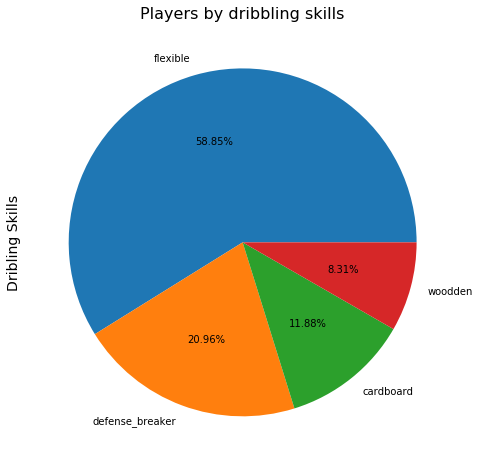

In [62]:
players_2016_new["dribbling_ord"].value_counts().plot.pie(figsize=(8,8), autopct="%.2f%%")
plt.title('Players by dribbling skills', fontsize=16)
plt.ylabel("Dribling Skills", fontsize=14)

- Bar Chart # 1: The Count plot shows counts across two categorical variables: ratting_score and dribbling skills. 

Text(0.5, 0, 'overal_ratting_score')

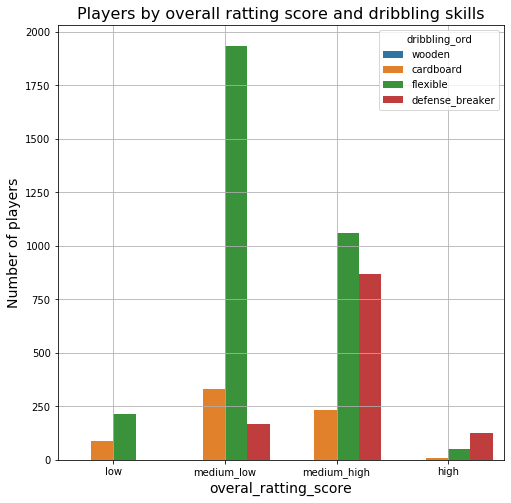

In [190]:
fig, ax = plt.subplots(figsize= (8,8))
sns.countplot(x = 'rating_score_ord', hue = 'dribbling_ord', data = players_2016_new, order=['low', 'medium_low', 'medium_high', 'high'], hue_order =['wooden', 'cardboard', 'flexible', 'defense_breaker'])
plt.grid(True)
plt.title('Players by overall ratting score and dribbling skills', fontsize=16)
plt.ylabel('Number of players', fontsize=14)
plt.xlabel('overal_ratting_score', fontsize=14)

- Bar Chart # 2: The Count plot shows counts across two categorical variables: rating_score and ball_control. 

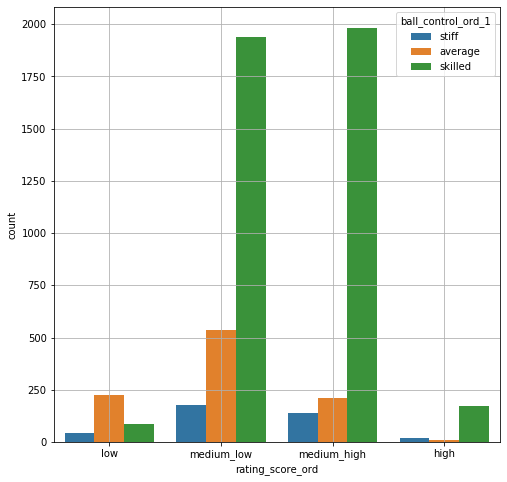

In [178]:
fig, ax = plt.subplots(figsize= (8,8))
sns.countplot(x = 'rating_score_ord', hue = 'ball_control_ord_1', data = players_2016_new, order=['low', 'medium_low', 'medium_high', 'high'], hue_order =['stiff', 'average', 'skilled'])
plt.grid(True)
plt.title('Players by overall ratting score and ball_control', fontsize=16)
plt.ylabel('Number of players', fontsize=14)
plt.xlabel('overal_ratting_score', fontsize=14)

- Bar Chart # 3: The Count plot shows counts across two categorical variables: height and dribbling skills.

In [191]:
fig, ax = plt.subplots(figsize= (8,8))
sns.countplot(x = 'dribbling_ord', hue = 'height_ord' , data = players_2016, order=['wooden', 'cardboard', 'flexible', 'defense_breaker'], hue_order =['really_short', 'normal', 'tall', 'really_tall', 'monster_tall'])
plt.grid(True)
plt.title('Players by dribbling skills and height', fontsize=16)
plt.ylabel('Number of players', fontsize=14)
plt.xlabel('dribbling_skills', fontsize=14)

Text(0.5, 0, 'dribbling_skills')

- Bar Chart # 4: The Count plot shows counts across two categorical variables: height and ball control skills.

Text(0.5, 0, 'Ball control skills')

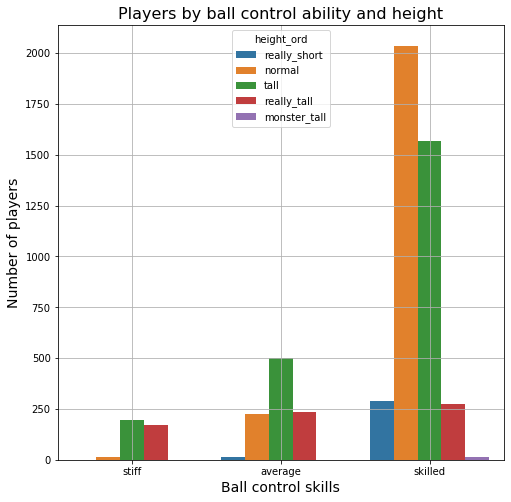

In [196]:
fig, ax = plt.subplots(figsize= (8,8))
sns.countplot(x = 'ball_control_ord_1', hue = 'height_ord' , data = players_2016, order=['stiff', 'average', 'skilled'], hue_order =['really_short', 'normal', 'tall', 'really_tall', 'monster_tall'])
plt.grid(True)
plt.title('Players by ball control ability and height', fontsize=16)
plt.ylabel('Number of players', fontsize=14)
plt.xlabel('Ball control skills', fontsize=14)


### Research Question 1: Is there any negative or positive correlation between height and ball control and dribling skills? 
> To answer these questions, I have some regressions between my dependent variables (dribbling and ball_control) and the independent variable height. Usually we are told that smaller players are better at dodging opponents, and also way more skillful at maneuvering the ball. The following plots show that, in general terms, the correlation between height and those skills is negative, that is, the shorter the player, the better he is at steering the ball through the opponent team´s defense. I also computed the same regression with the variable weight, because weight might be a good proxy of height, especially among high performance athletes.  

- Pairplot # 1: Correlation between ball control, dribbling against height. In general terms, the correlation between height and those skills is negative, that is, the shorter the player, the better he is at steering the ball through the opponent team´s defense.

Text(0.5, 1, 'Ball control and dribbling by height                         ')

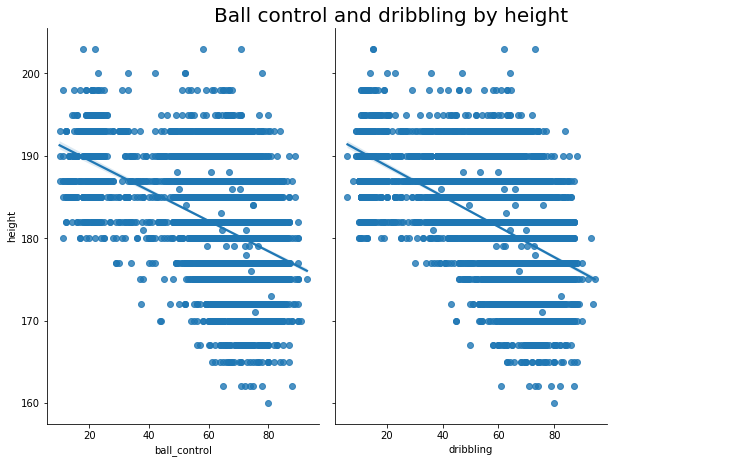

In [214]:
sns.pairplot(players_2016_new, x_vars = ['ball_control', 'dribbling'], y_vars = 'height', height=6, aspect=0.7, kind='reg')
plt.title('Ball control and dribbling by height                         ', fontsize=20)

- Pairplot # 2: Correlation between ball control, dribbling with weight. In general terms, the correlation between weight and those skills is negative, that is, the lighter the player, the better he is at moving the ball through the opponent team´s defense.

Text(0.5, 1, 'Ball control and dribbling by weight                         ')

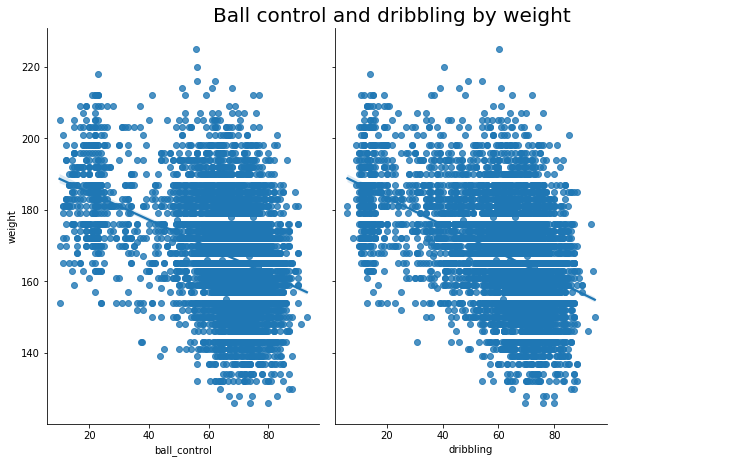

In [66]:
sns.pairplot(players_2016_new, x_vars = ['ball_control', 'dribbling'], y_vars = 'weight', height=6, aspect=0.7, kind='reg')
plt.title('Ball control and dribbling by weight                         ', fontsize=20)

### Research Question 2: Is there any negative or positive correlation between strenght, agility and the dependent variables, ball control and dribling skills? 

> In this question we will use the variables strength and agility as a proxy of 'height'. High strength will be understood as an indicator of a tall player, while high agility will be a sign of a small or midsize player. The first plot shows that there is a negative correlation, thought a quite mild one, between strength and our dependent variables ball control and dribbling. In other words, high strength is not a good predictor of a high score on ball control and dribbling. On the other hand, the second plot shows clearly that there is a positive correlation between agility (defined as the ability to move quickly and easily) and the dependent variables ball control and dribbling.

- Pairplot # 3: Correlation between ball control, dribbling and strenght. The correlation between strenght and ball control and dribbling skills is negative, that is, the shorter the player, the better he is at controling and dodge defenders.

Text(0.5, 1, 'Ball control, dribbling, and weight by strength                                                   ')

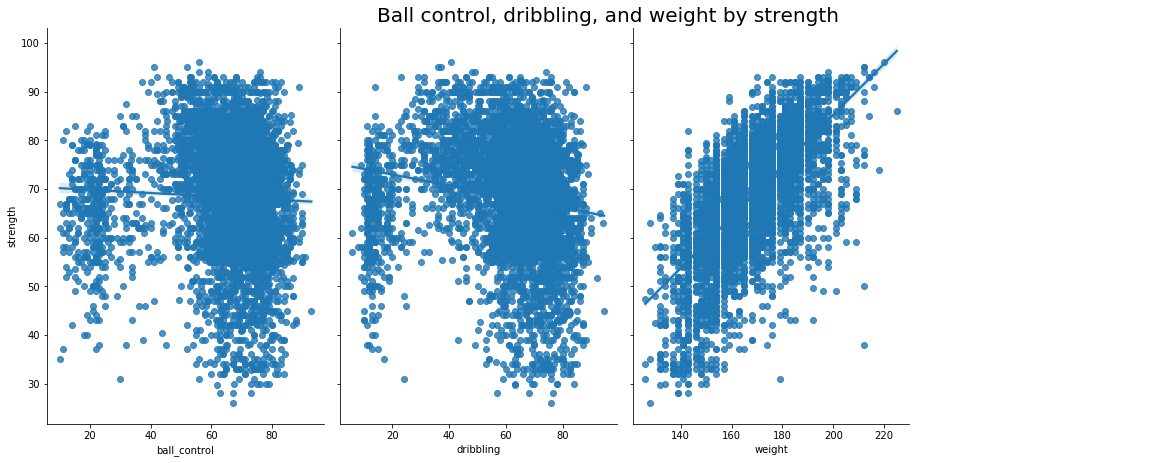

In [69]:
sns.pairplot(players_2016_new, x_vars = ['ball_control', 'dribbling', 'weight'], y_vars = 'strength', height=6, aspect=0.7, kind='reg')
plt.title('Ball control, dribbling, and weight by strength                                                   ', fontsize=20)

- Pairplot # 4: Correlation between ball control, dribbling, height with agility. As expected, the correlation between agility and height is negative, shorter players score better in agility. 

Text(0.5, 1, 'Ball control, dribbling and height by agility                                                             ')

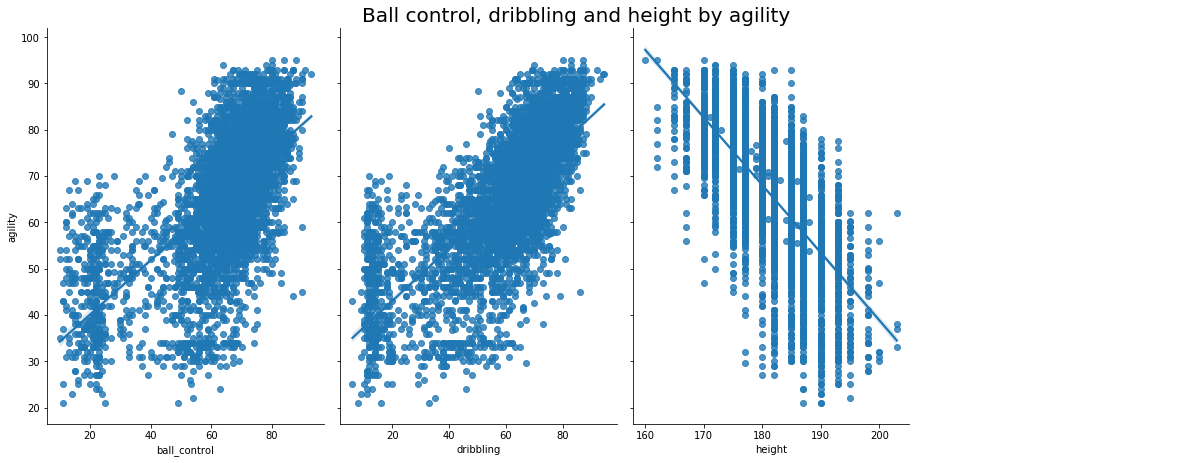

In [71]:
sns.pairplot(players_2016_new, x_vars = ['ball_control', 'dribbling', 'height'], y_vars = 'agility', height=6, aspect=0.7, kind='reg')
plt.title('Ball control, dribbling and height by agility                                                             ', fontsize=20)

<a id='conclusions'></a>
## Conclusions


Messi, Iniesta, Alexis; all incredible dodgers. All three are smaller than the average player, and all three are way more talented with the ball than any other soccer athlete. The analysis presented here seems to go in the same direction; it shows that there is a negative correlation between the size of a player and the development of some crucial skills such as ball control and dribbling. However, this is just a simple correlation. In any case the analysis presented here corresponds to an evidence of a causal relationship. In other words, there is no enough evidence to say that taller players cannot be as good with the ball as shorter players. Such conclusions will require further research and analysis.  

Especifically, the variable height correlates negatively with ball control and dribbling. The same happens with the variable weight, which is understood as a proxy of height. Skilled players tend to be short or mid-size, that is, less than 5 foot and 9 inches, or 180 cm. 
In second place, the variable agility correlates positively with ball control and dribbling. The analysis uses here agility as a proxy of size; actually, the correlation between agility and height is negative, that is, taller players have a lower score on the agility variable. The variable strength correlates negatively with the variables ball control and dribbling, but this correlation is mild and not quite as strong compared to the others. We can conclude that while agility is a great predictor of the score on the ball control and dribbling variables, strength does not work as a predictor variable of the dependent variables. 



<a id='conclusions'></a>
## Limitations

- The age of the player is not included in the analysis. Nowadays soccer players in their 30´s are able to stay as fit and athletic as their twenties teammates. However, age should play a role in further analysis of ball control skills and its correlation with size and weight. The data provides the birthday of each player, so the idea is completely doable. 
- Almost 40 columns have null values: I dropped null values, but their existence might influence the analysis.  
- The analysis is a mere correlation between variables and does not show any type of causal connection between size and skills. Moreover, the analysis just predicts the relation of two variables. To push the analysis further, we might try to observate the interaction of more than two statistical variables at a time by utilizing multivariate models. 
- The analysis is limited to 2016 even though the data includes data from different years. 
- Soccer Leagues are not included into the analysis. Given that the nature of soccer played in leagues throughout Europe differs in intensity, style and tactics, soccer leagues might influence how players are evaluated. For example, a skilled player playing in an ultra defensive and tough league like the Italian Serie A, might have gotten lower scores than an equally skilled player, playing in Spanish La Liga, which gives a lot more room to pass, move around, dodge and dribble (like Barcelona's Tiki Taka).
- Country of origin of players. Soccer players from Latin America have a different type of training, and develop different skills with the ball. In Latin America we start playing since we are very little and we focus more on ball control skills than in the physical part of it. So, maybe the analysis is culturally biased without noticing it; to get the analysis to a different level we should try to include the variable "country of origin" into the data. However, tha data base does not provide nationality of players.   